### Data:
### The Data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### The dataset provides the bank customers’ information. It includes 41,188 records and 21 fields.

In [2]:
df = pd.read_csv("../DataSets/Bank.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
df.shape

(41188, 21)

### Data Preprocessing

### Check unique values for categorical features

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null float64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(6), int64(5), object(10)
memory us

In [5]:
catfeatures = []
for i in df.columns.tolist():
    if df[i].dtype == 'object':
        catfeatures.append(i)

In [6]:
catfeatures

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [7]:
for j in catfeatures:
    print("Column:", j)
    print("Unique Values:")
    print(df[j].unique())
    print("")

Column: job
Unique Values:
['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student']

Column: marital
Unique Values:
['married' 'single' 'divorced' 'unknown']

Column: education
Unique Values:
['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']

Column: default
Unique Values:
['unknown' 'no' 'yes']

Column: housing
Unique Values:
['yes' 'no' 'unknown']

Column: loan
Unique Values:
['no' 'yes' 'unknown']

Column: contact
Unique Values:
['cellular' 'telephone']

Column: month
Unique Values:
['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec']

Column: day_of_week
Unique Values:
['thu' 'fri' 'tue' 'mon' 'wed']

Column: poutcome
Unique Values:
['nonexistent' 'success' 'failure']



### Education columns contains basic.9y, basic.6y, basic.4y, as it associates to basic education, we will simply replace them with basic term

In [8]:
df['education'] = np.where(df['education'] =='basic.9y', 'Basic', df['education'])
df['education'] = np.where(df['education'] =='basic.6y', 'Basic', df['education'])
df['education'] = np.where(df['education'] =='basic.4y', 'Basic', df['education'])

In [9]:
df.education.unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

### Check missing values

In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

### Data exploration

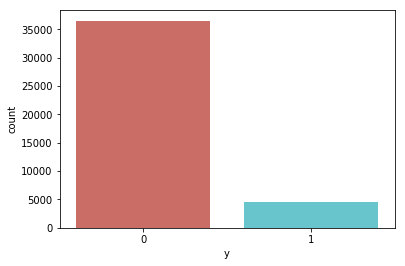

In [11]:
sns.countplot(x='y', data=df, palette='hls')
plt.show()

There are 36548 no's and 4640 yes's in the outcome variables.

In [12]:
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913341,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


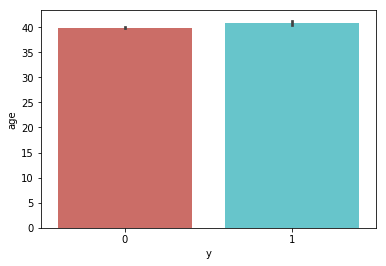

In [13]:
sns.barplot(x= df.y, y=df.age, palette='hls')
plt.show()

Observations:

The average age of customers who bought the term deposit is higher than that of the customers who didn't. 

The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale. 

Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

In [14]:
df.groupby(['job', 'y']).mean()

age    duration  campaign       pdays  previous  \
job           y                                                          
admin.        0  38.219846  215.093385  2.707718  981.270783  0.141125   
              1  37.968935  517.414201  2.058432  773.512574  0.510355   
blue-collar   0  39.582057  229.878018  2.588208  991.516365  0.111653   
              1  39.200627  732.673981  2.156740  899.324451  0.269592   
entrepreneur  0  41.703453  225.632883  2.579580  987.813814  0.128378   
              1  41.935484  667.540323  2.064516  910.943548  0.250000   
housemaid     0  44.705451  218.778826  2.722222  986.491614  0.089099   
              1  52.650943  535.537736  1.896226  727.367925  0.575472   
management    0  42.309707  220.828197  2.532357  984.848613  0.140986   
              1  42.783537  543.804878  2.030488  786.929878  0.533537   
retired       0  59.926128  224.263608  2.657076  960.369362  0.212286   
              1  68.253456  420.235023  1.942396  712.937788  0.668203   
self-employed 0  40.176887  222.220912  2.724843  988.073113  0.123428   
              1  38.006711  622.020134  2.114094  878.859060  0.315436   
services      0  38.090236  225.047998  2.619309  991.091607  0.136314   
              1  36.077399  634.851393  2.232198  854.479876  0.365325   
student       0  26.396667  228.851667  2.238333  924.596667  0.395000   
              1  24.803273  403.316364  1.810909  656.116364  0.807273   
technician    0  38.600033  213.452021  2.641776  985.135540  0.111093   
              1  37.746575  553.190411  2.046575  793.676712  0.505479   
unemployed    0  39.844828  212.706897  2.668966  973.879310  0.131034   
              1  39.062500  471.451389  1.930556  702.333333  0.611111   
unknown       0  45.375427  204.559727  2.679181  954.873720  0.095563   
              1  47.054054  517.756757  2.405405  810.864865  0.621622   

                 emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
job           y                                                           
admin.        0      0.224068       93.566030     -40.349768   3.786567   
              1     -1.383210       93.319537     -39.545488   1.965078   
blue-collar   0      0.303552       93.668887     -41.346565   3.835402   
              1     -0.487774       93.491480     -41.770846   2.915715   
entrepreneur  0      0.242868       93.626245     -41.319820   3.881632   
              1     -0.745161       93.381153     -40.895161   2.818839   
housemaid     0      0.641300       93.712759     -39.626834   4.243082   
              1     -1.437736       93.350934     -38.311321   1.908717   
management    0      0.141217       93.550062     -40.619992   3.785477   
              1     -1.230793       93.306631     -39.456402   2.232896   
retired       0     -0.283904       93.493273     -38.920762   3.249794   
              1     -1.926267       93.245629     -37.542857   1.348569   
self-employed 0      0.242610       93.591786     -40.501022   3.854206   
              1     -1.173154       93.288470     -40.377852   2.282242   
services      0      0.256720       93.650433     -41.327537   3.793805   
              1     -0.743034       93.456598     -40.866873   2.631139   
student       0     -1.133167       93.350790     -40.751500   2.208683   
              1     -2.007636       93.289771     -38.957091   1.176313   
technician    0      0.441693       93.584196     -39.918310   4.012318   
              1     -1.102055       93.374286     -40.003836   2.239584   
unemployed    0      0.147241       93.604369     -40.193908   3.775461   
              1     -1.676389       93.318563     -38.881944   1.600444   
unknown       0      0.555290       93.748703     -38.882594   4.154038   
              1     -1.205405       93.483270     -38.127027   2.325622   

                 nr_employed  
job           y               
admin.        0  5175.512051  
              1  5087.736760  
blue-collar   0  5178.2

In [15]:
df.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158791,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [16]:
df.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163981,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


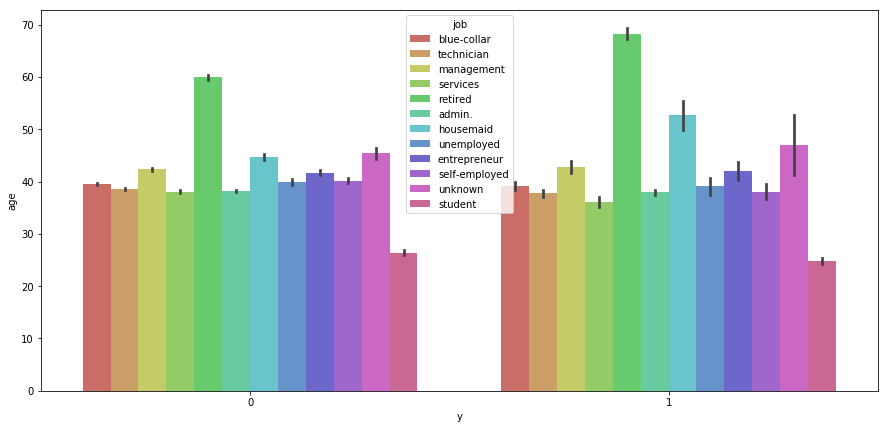

In [17]:
plt.figure(figsize=(15,7))
sns.barplot(x= df.y, y=df.age, hue=df.job, palette='hls')
plt.show()

### Visualizations:

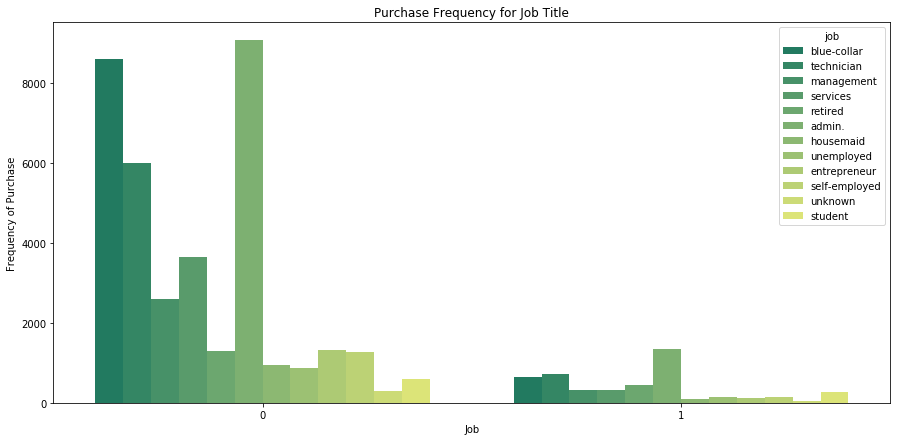

In [18]:
plt.figure(figsize=(15,7))
sns.countplot(df.y, hue=df.job, palette='summer')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.show()

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

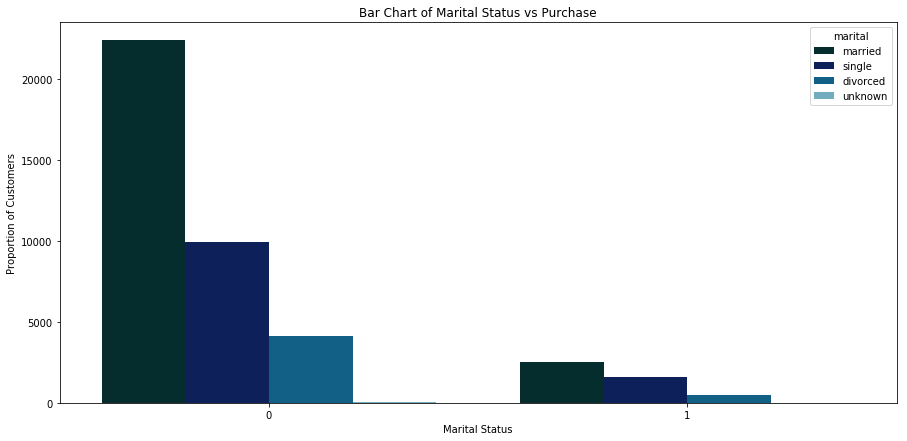

In [19]:
plt.figure(figsize=(15,7))
sns.countplot(df.y, hue=df.marital, palette='ocean')
plt.title('Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.show()

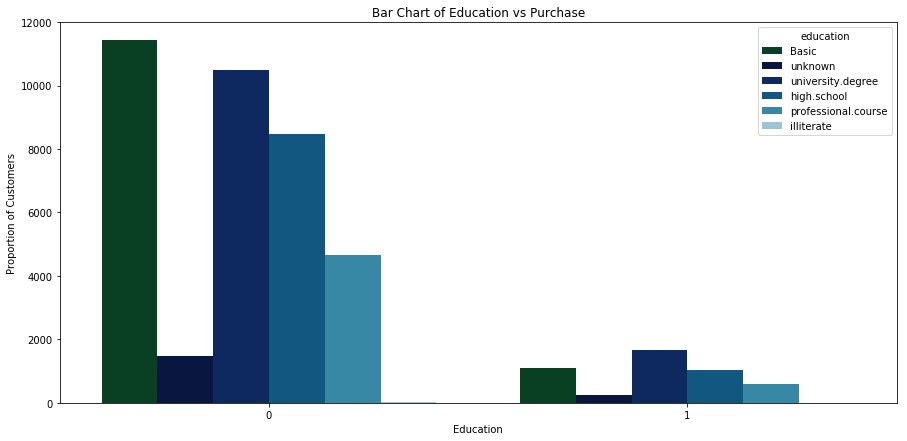

In [20]:
plt.figure(figsize=(15,7))
sns.countplot(df.y, hue=df.education, palette='ocean')
plt.title('Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.show()

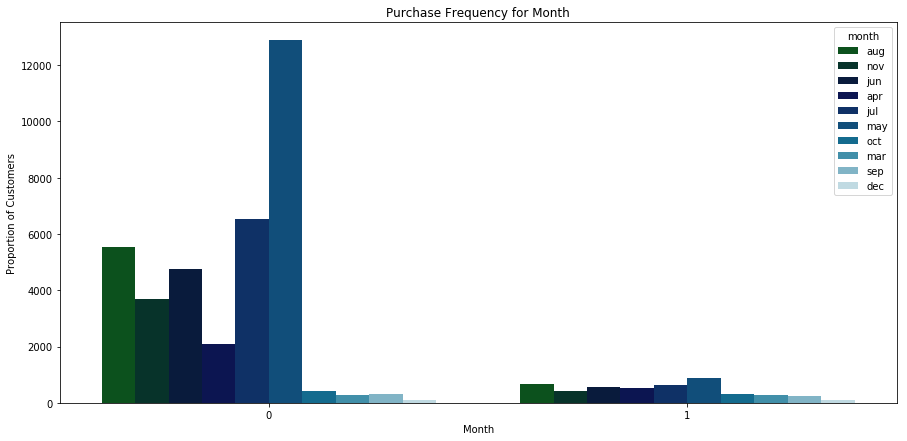

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(df.y, hue=df.month, palette='ocean')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Proportion of Customers')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


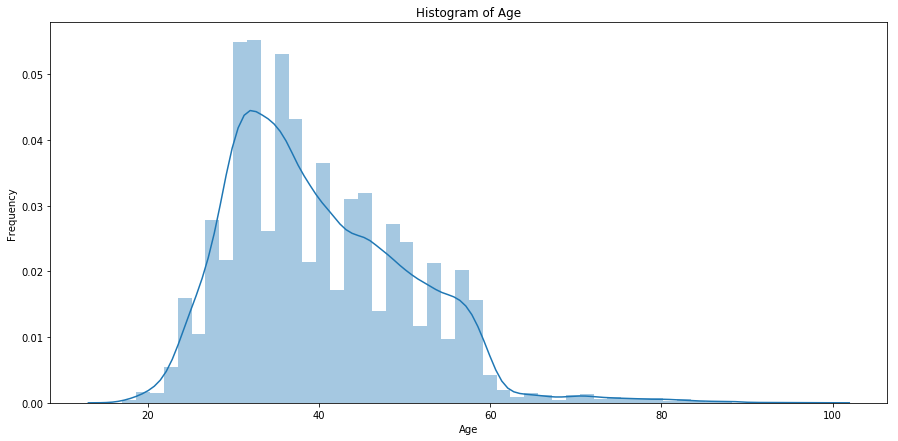

In [22]:
plt.figure(figsize=(15,7))
sns.distplot(df.age)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The most of the customers of the bank in this dataset are in the age range of 30-40.

### Create dummy variables

In [23]:
catfeatures

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [24]:
df_new = pd.get_dummies(columns=catfeatures, data=df, drop_first=True)

In [25]:
df_new.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44.0,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,1,0,0,1,0
1,53.0,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,1,0,0,0,0,0,0,1,0
2,28.0,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,0,1,0,0,0,1
3,39.0,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,0,0,0,0,0,1,0
4,55.0,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,0,0,0,0,0,1


In [26]:
df_new.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

### Seperate features and target

In [27]:
y = df_new['y'].values

In [28]:
x = df_new.drop('y', axis=1).values

### Splitting data into training and testing part

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

### Create a predictive model using Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression()

In [33]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
y_pred = model.predict(x_test)

In [35]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Showing predictive class probabilities

In [36]:
print(model.predict_proba(x_test))

[[0.97844212 0.02155788]
 [0.9926769  0.0073231 ]
 [0.99116552 0.00883448]
 ...
 [0.98404944 0.01595056]
 [0.97420884 0.02579116]
 [0.98476991 0.01523009]]


### Evaluate model by calculating accuracy score and drawing confusion matrix

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
score = accuracy_score(y_test, y_pred)
print("Accuracy Score:", score)

Accuracy Score: 0.9063688597556041


In [39]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10629,   282],
       [  875,   571]], dtype=int64)

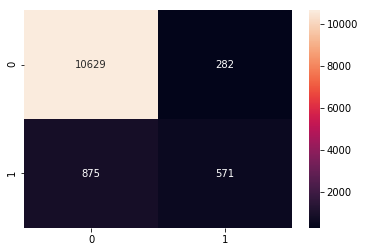

In [40]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
modelCV = LogisticRegression()

In [43]:
scores = cross_val_score(modelCV, x, y, cv=10, scoring='accuracy')

In [44]:
scores

array([0.9055596 , 0.91405681, 0.91065793, 0.91041515, 0.90580238,
       0.90968682, 0.90823015, 0.91357126, 0.90917921, 0.91136474])

In [45]:
print("10-fold cross validation average accuracy: %.3f" % (scores.mean()))

10-fold cross validation average accuracy: 0.910
